In [88]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

# Leitura e Tratamento dos dados


* Leitura do arquivo.

In [89]:
nome_arquivo_csv = 'data/desafio_indicium_imdb.csv'
dados = pd.read_csv(nome_arquivo_csv)


* É necessário fazer certos ajustes nos dados, como conversão de tipo de dado pois alguns dados númericos estão em outro formato,  convertemos esses valores para o tipo float, pois dessa forma não sera necessário apagar valores que são NaN.

In [90]:
dados['Meta_score'] = dados['Meta_score'].astype(float)

dados["Runtime"] = dados["Runtime"].str.replace(' min', '')
dados["Runtime"] = dados["Runtime"].astype(float)

#dados.dropna(subset= ['Gross'], inplace=True)
dados['Gross'] = dados['Gross'].str.replace(',', '')
dados['Gross'] = dados['Gross'].astype(float)

dados = dados.drop(dados[dados['Released_Year'] == 'PG'].index)
dados['Released_Year'] = dados['Released_Year'].astype(float)

pallete = 'plasma'
d1 = dados.copy()

# Análise Explaratória dos Dados

* É necessário uma análise exploratória dos dados para ver como esses dados se comportam, a partir desta análise é possivel obter insigiths sobre os dados.    
Com esta análise podemos obter descrições detalhada dos dados como entendimento das variáveis (colunas), tipos de dados (numéricos, categóricos), e a estrutura do conjunto de dados (linhas e colunas) e com isto teremos maiores entendimento sobre os dados que estamos trabalhando.     
Uma boa análise é ver como se comportam a maioria dos filmes, como por exemplo quais são os gêneros mais comuns, quais são as classificações etárias mais comuns.    



* Para análisar os gêneros dos filmes é necessario fazer uma separação já que alguns gêneros estão juntos como em dark knight que está Action, Crime, Drama.    
Portanto, queremos saber qual é o genero que mais aparece entre os filmes e por isso é necessário a separação.


* Com esta separação podemos ver que os gêneros mais comuns são drama, comédia e crime com drama sendo o mais comum entre os filmes com mais de 700 filmes enquanto os outros gêneros estão abaixo de 250 filme.

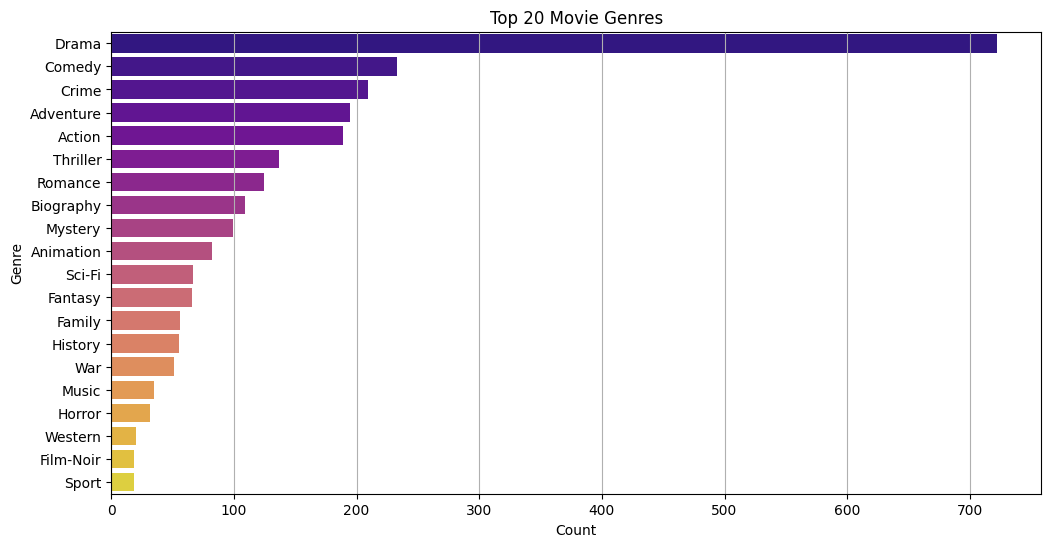

In [91]:
#Distribution of Movie Genres
genre_series = dados['Genre'].dropna().apply(lambda x: x.split(', '))
genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(genres).value_counts().head(20)  

plt.figure(figsize=(12, 6))
sn.barplot(x=genre_counts.values, y=genre_counts.index,palette=pallete)
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()

* Ao análisar as classificações etárias vemos que a classificação etária mais comum dos filmes é U que é Universal, ou seja, para todas as idades, em segundo está A que significa Adult e indica que o conteúdo é apropriado para adultos e pode conter temas maduros e em terceiro  é UA que é Acompanhamento de Adulto, indicando que o conteúdo é apropriado para um público mais jovem com a presença de um adulto.    

* As classificações A e UA estão com números próximos uma da outra com menos de 200 filmes, porém a classificção U passa de 200 filmes sendo algumas posições a mais que as classificações A e UA.

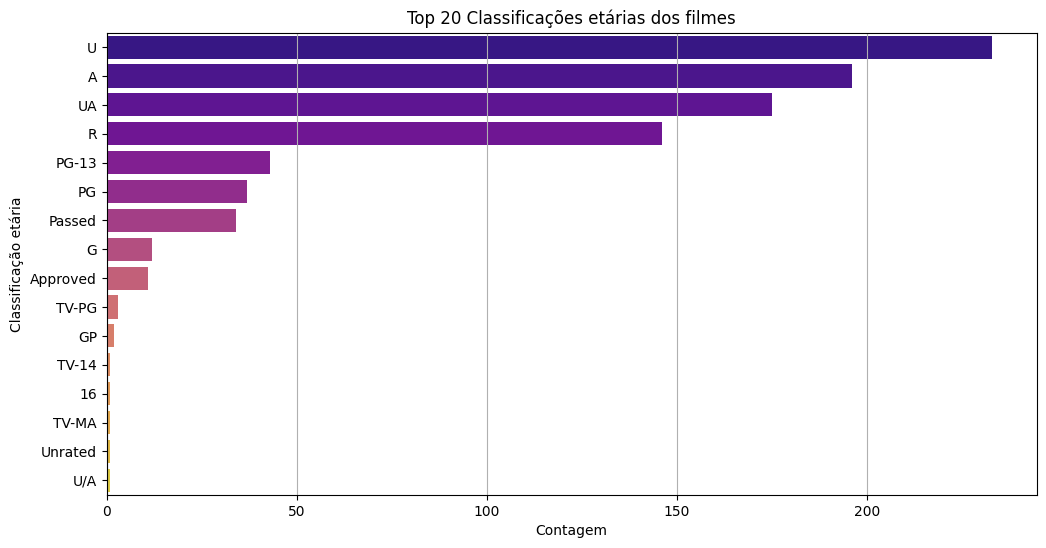

In [92]:
#Distribution of Movie Genres
genre_series = dados['Certificate'].dropna().apply(lambda x: x.split(', '))
genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(genres).value_counts().head(20)  

plt.figure(figsize=(12, 6))
sn.barplot(x=genre_counts.values, y=genre_counts.index, palette=pallete,)
plt.title('Top 20 Classificações etárias dos filmes')
plt.xlabel('Contagem')
plt.ylabel('Classificação etária')
plt.grid(True, axis='x')
plt.show()

* Abaixo análisamos os top 20 primeiros diretores dos filmes, vemos que os dois primeiros colocados são Alfred Hitchcock e Steven Spielberg que possuem mais de 12 filmes enquanto os outros diretores possuem menos de 10 filmes exceto por Hayao Miyazaki que possui 11 filmes.

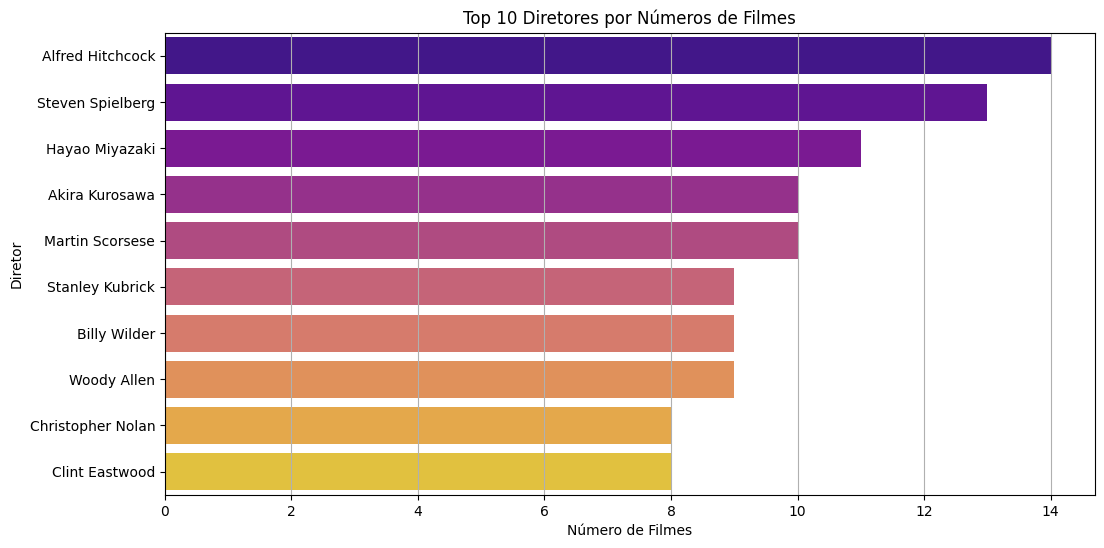

In [93]:

# Supondo que 'df' seja o DataFrame contendo os dados
top_directors = dados['Director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sn.barplot(x=top_directors.values, y=top_directors.index, orient='h',palette=pallete)
plt.title('Top 10 Diretores por Números de Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.grid(True, axis='x')
plt.show()


## Análise de Ranking dos filmes

* O IMDb (Internet Move Database) é uma das maiores base de dados online sobre cinema e tudo o que envolve a indústria do entretenimento. [ (I)](https://tecnoblog.net/responde/como-funcionam-as-notas-do-imdb/)   
Abaixo podemos ver as distribuições de ranking do imdb, é possível observar que a maioria dos filmes estão com notas superiores a 7.6 e inferiores a 8.1.    
Podemos ver tambem que a quantidade de filmes com notas acima de 8.1 é bem menor, sendo um grupo pequeno, e que diminui ainda mais nos ranking acima de 8.7.  
Isto indica que há poucos filmes com nota tão alta no ranking.  

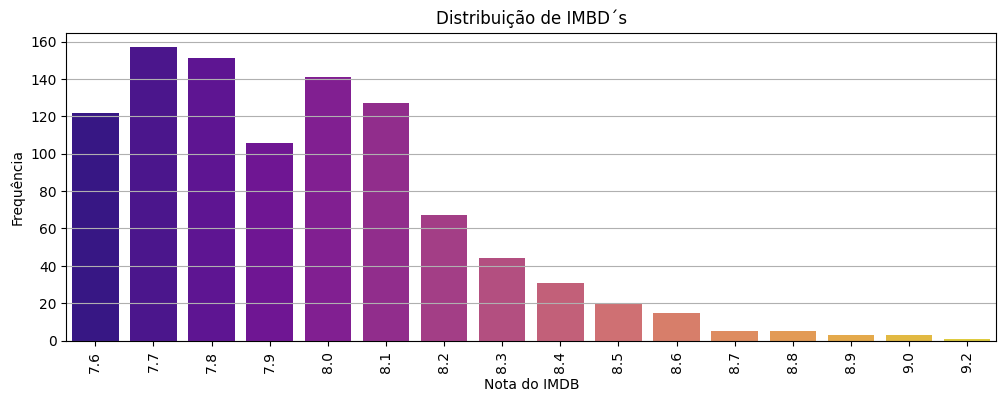

In [94]:
Distribution_Rating = dados['IMDB_Rating'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
sn.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values,palette=pallete)
plt.title("Distribuição de IMBD´s")
plt.xlabel('Nota do IMDB')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

* Já ao análisar o Meta Score vemos que distribuidos de forma que a maioria dos filmes tem um valor de meta score bem alto estando em acima de 72 e menor que 91.   
A grande difernça entre os gráficos de IMDB e meta score é que o meta score possui muitos valores acima de 8.5, enquanto o ranking de IMDB não possui notas tão altas .   
Isto pode ser notado quando vemos que notas acima de 8.5 são mais raras no ranking de IMDB, enquanto no meta score as notas mais raras são as acima de 97.0 e abaixo de 65. 

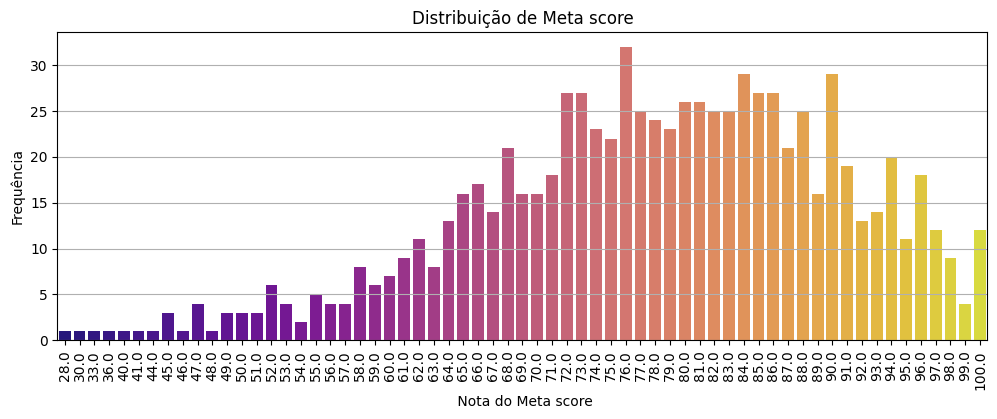

In [95]:
Distribution_Rating = dados['Meta_score'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
sn.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette=pallete)
plt.title("Distribuição de Meta score")
plt.xlabel(' Nota do Meta score')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

* Abaixo podemos ver a análise bivariada de Diretores por IMDB rating, podemos ver que não há tantas diferenças nas notas de avaliação, sendo os dois primeiros colocados com 8.7 de avaliação e os demais em 8.6 com somente o último em 8.5 com isso podemos ver que não há grandes diferenças nos dados.

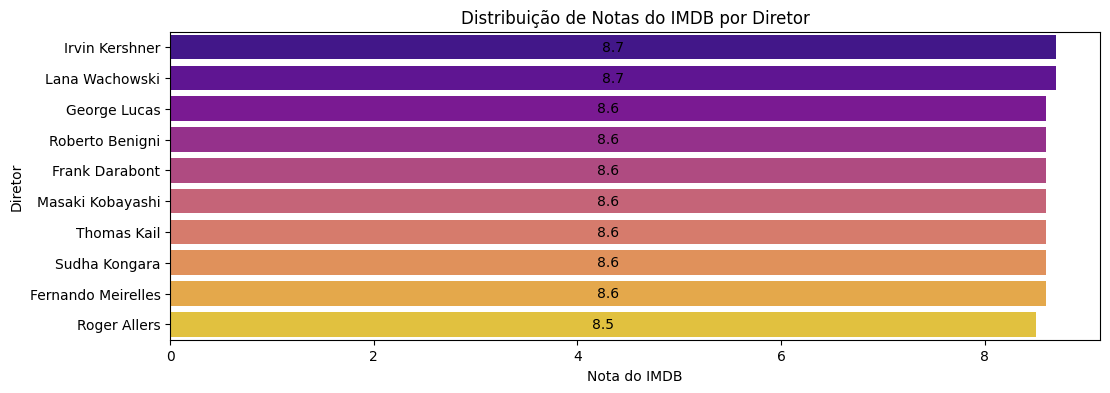

In [96]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = dados.groupby("Director")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sn.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes,palette=pallete,)
for container in axes.containers:
    axes.bar_label(container, label_type="center")
plt.title("Distribuição de Notas do IMDB por Diretor")
plt.xlabel('Nota do IMDB')
plt.ylabel('Diretor')
plt.show()

* Podemos análisar tambem a classificação etária por avaliação de IMDB, assim vemos no gráfico abaixo que a classificação etária com maior ranking é TV-14(Não recomendado para menores de 14 anos) isto pode indicar que filmes que possuem uma classificação inidicativa para adolescentes tem melhores avaliações.   
Vemos que nas colocações abaixo de TV-14 está 16, TV-MA  e Unrated, o que reforça que filmes para pessoas mais velhas tendem a ter pontuação ais alta.

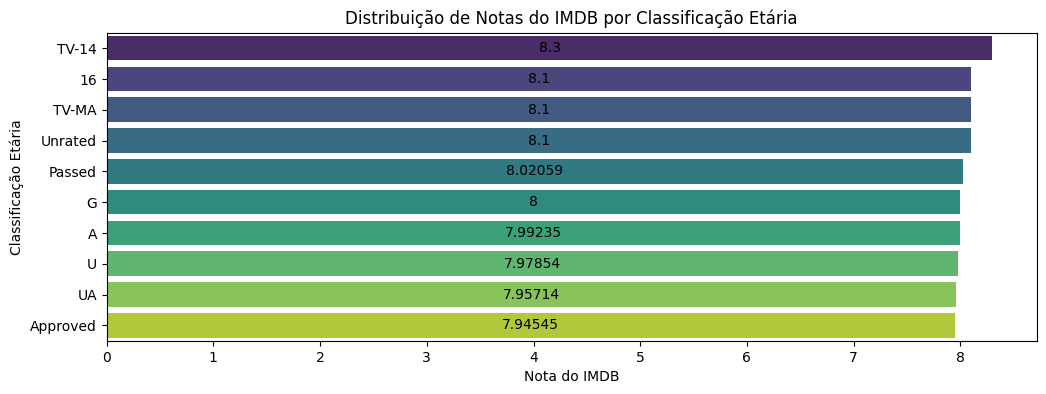

In [97]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = dados.groupby("Certificate")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sn.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='viridis')
for container in axes.containers:
    axes.bar_label(container, label_type="center")
plt.title("Distribuição de Notas do IMDB por Classificação Etária")
plt.xlabel('Nota do IMDB')
plt.ylabel('Classificação Etária')
plt.show()

* Ao análisar o gráfico de Nota IMDB por Tempo de Duração de filme vemos que os filmes com pouquissimo tempo de duração tem notas mais baixas no ranking e que filmes com notas mais altas acima de 8.6 tem duração acima de 125 minutos.   
Sabemos que filmes tem um padrão de tempo de duração e por isso há uma grande concentração de pontos entre 100 e 150 minutos de filme.

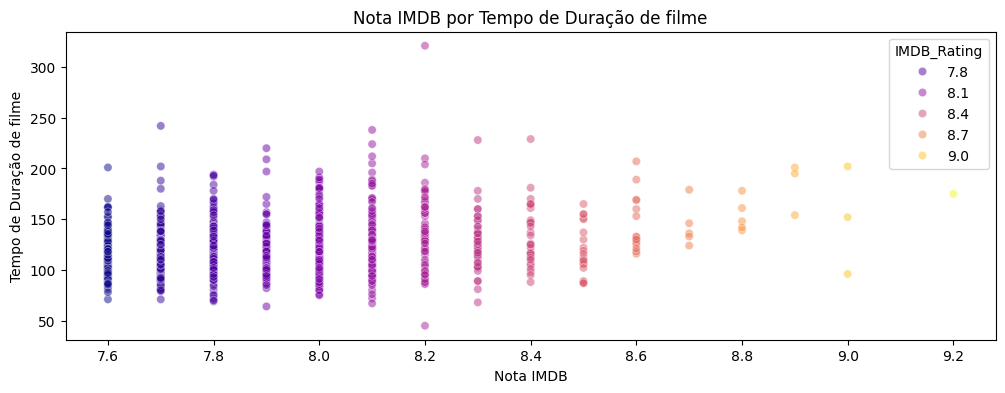

In [98]:
plt.figure(figsize=(12, 4))
scatter = sn.scatterplot(x=dados['IMDB_Rating'], y=dados['Runtime'], 
                          hue=dados['IMDB_Rating'], 
                          palette=pallete, 
                          alpha=0.5)

plt.title('Nota IMDB por Tempo de Duração de filme')
plt.xlabel('Nota IMDB')
plt.ylabel('Tempo de Duração de filme')

plt.show()

* Na análise abaixo de Nota IMDB por Ano do filme podemos ver que há uma grande concentração de pontos acima de 1980 isto decorre do fato que a indústria do cinema foi mais valorizada a medida que os anos passavam.   
Também é possível perceber que há muitas concetrações de pontos em notas abaixo de 8.4, e notas acima de 8.4 tendem a ter menos pontos.   
Outro insights que obtemos é que as notas acima de 8.4 tendem a ser de filmes de acima dos anos de 1980 quando a indústria começa a crescer, ou seja, notas altas tendem a ser de filmes menos antigos.   

Text(0, 0.5, 'Ano do filme')

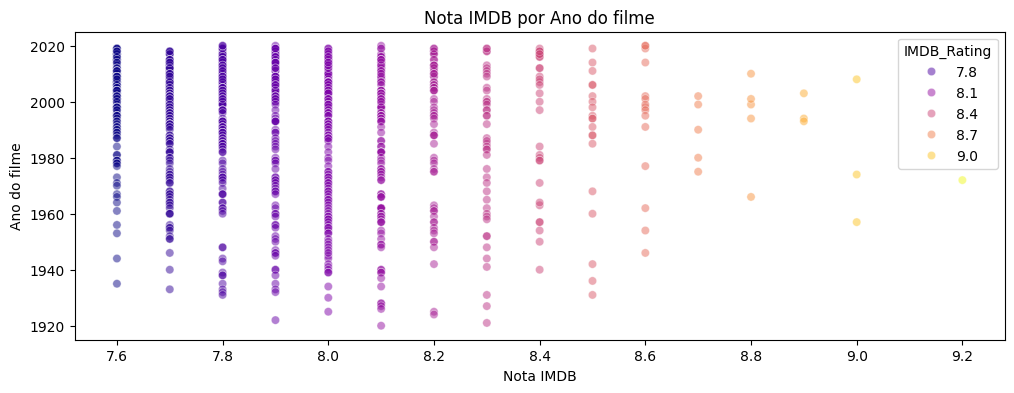

In [99]:
plt.figure(figsize=(12, 4))
scatter_year = sn.scatterplot(x=dados['IMDB_Rating'], y=dados['Released_Year'], 
                          hue=dados['IMDB_Rating'], 
                          palette=pallete, 
                          alpha=0.5)
plt.title('Nota IMDB por Ano do filme')
plt.xlabel('Nota IMDB')
plt.ylabel('Ano do filme')


## Análise de Faturamento

* Outra informação interessante sobre os filmes é seu faturamento que movimentam a economia global.    
No balanço geral, os Estados Unidos produzem entre 600 e 700 filmes por ano que movimentam US$ 120 bilhões e geram mais de 200 mil empregos diretos - mais da metade na Califórnia. [(II)](https://exame.com/economia/de-bolly-a-nollywood-as-4-megaindustrias-de-cinema-do-mundo/)  
Assim, análisaremos as informações gerais de faturamento sobre filmes.

* Abaixo podemos ver os anos dos filmes que mais faturaram, vemos que o ano de 1977 foium dos anos que mais faturou o que é bem difentes dos outros anos que tem maior faturamento, os outros anos são acima de 2008 o que faz o ano de 1977 ser bem difente.    
Ao análisar os outros anos vemos que de 2008 a 2010 foram otimos anos para a indústria pois estes anos seguidos estão entre os anos com maior faturmento,isto tambem ocorreu nos anos acima de 2015 sendo o ano de 2018 com o maior faturamento. 

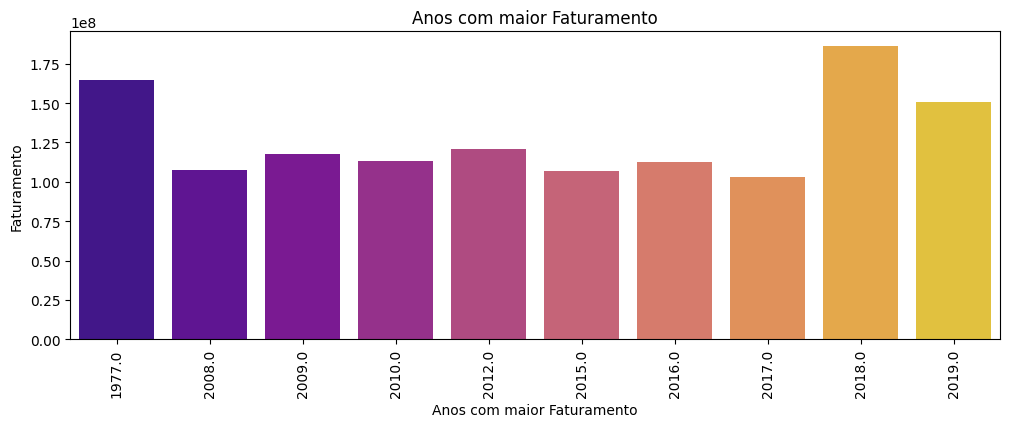

In [100]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = dados.groupby("Released_Year")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=False)
sn.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette=pallete)
for container in axes.containers:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.title("Anos com maior Faturamento")
plt.xlabel('Anos com maior Faturamento')
plt.ylabel('Faturamento')
plt.show()


* No gráfico abaixo podemos ver os filmes que obtiveram um alto faturamento.    
É possível ver que não uma diferença tao grande de um titulo para  o outro, mas podemos ver que os filmes que mais faturaram foram Star Wars: Episodi VII e Avengers: Endgame que foram filmes feitos nos últimos anos e que foram feitos para um público jovem e outra relação que é possível entre estes dois filmes é que eles são continuações de outros filmes o que atrai fãs como público, isto é possível perceber por causa de seus títulos. 

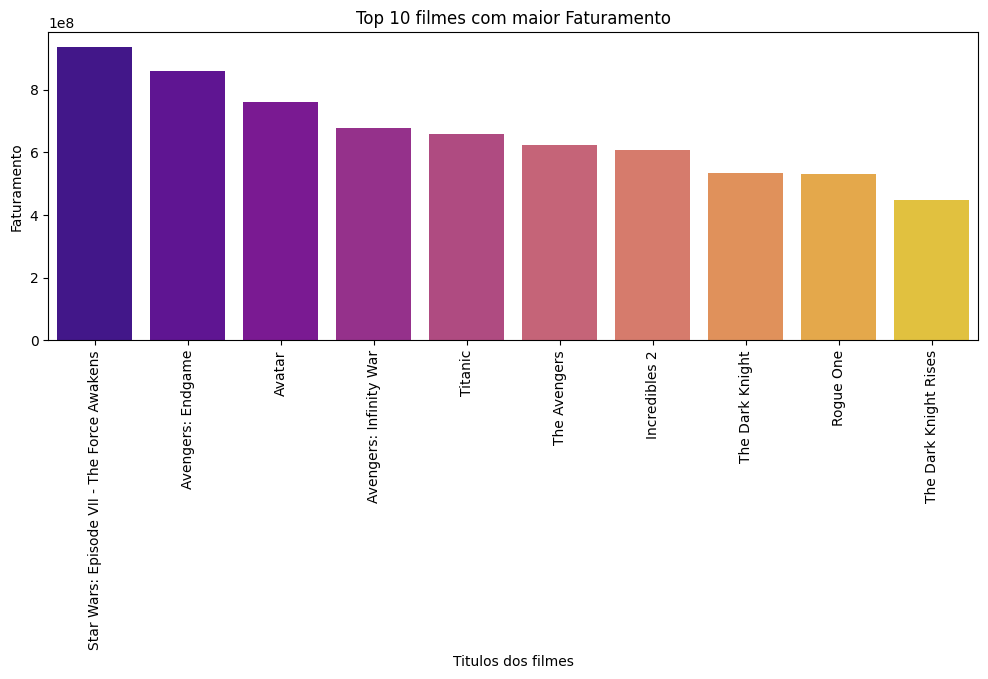

In [101]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = dados.groupby("Series_Title")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=False)
sn.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette=pallete)
for container in axes.containers:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.title("Top 10 filmes com maior Faturamento")
plt.xlabel('Titulos dos filmes')
plt.ylabel('Faturamento')
plt.show()

* Outra análise que podemos fazer é qual classificação etária pode ter um maior faturamento.   
Com o gráfico abaixo podemos ver que a classificação com maior faturamento é UA que está terceira posição nos tipos de classificação mais produzidos em filmes e que tem média de nota 7.95 nos rankings de nota de do IMDB.    
Assim, vemos que mesmo estando na nona posição do ranking é a classificação etária maior faturamento.

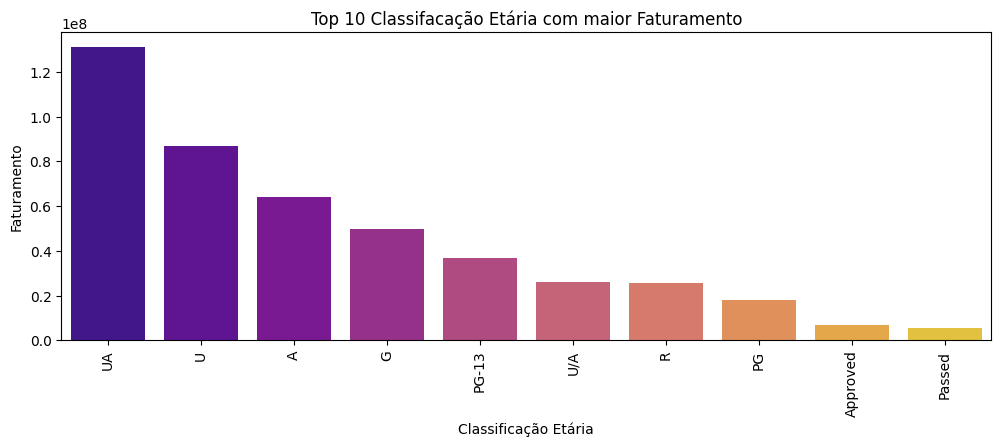

In [102]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = dados.groupby("Certificate")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=False)
sn.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette=pallete)
for container in axes.containers:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.title("Top 10 Classifacação Etária com maior Faturamento")
plt.xlabel('Classificação Etária')
plt.ylabel('Faturamento')
plt.show()

* Na análise de Nota IMDB por Faturamento feita abaixo, notas baixas de IMDB possuem menor faturamento, isto é visto na concentração de pontos nas notas baixas de IMDB.  
Porém, podemos ver que há filmes com uma nota mais baixa de IMDB que possuem um faturamento alto como é visto nas notas 7.8, 7.9, e 8.4.

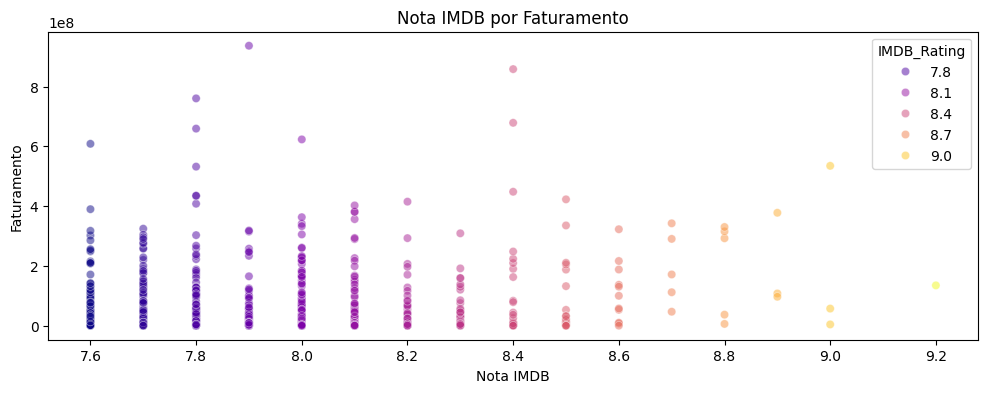

In [103]:
plt.figure(figsize=(12, 4))
scatter_gross = sn.scatterplot(x=dados['IMDB_Rating'], y=dados['Gross'], 
                          hue=dados['IMDB_Rating'], 
                          palette=pallete, 
                          alpha=0.5)

plt.title('Nota IMDB por Faturamento')
plt.xlabel('Nota IMDB')
plt.ylabel('Faturamento')

plt.show()

Isto também é possivel de se notar no gráfico boxplot que mostra que as notas mais baixas tem quantis mais baixos e que notas mais altas possuem quantis que estão mais altos indicando um faturamento maior.

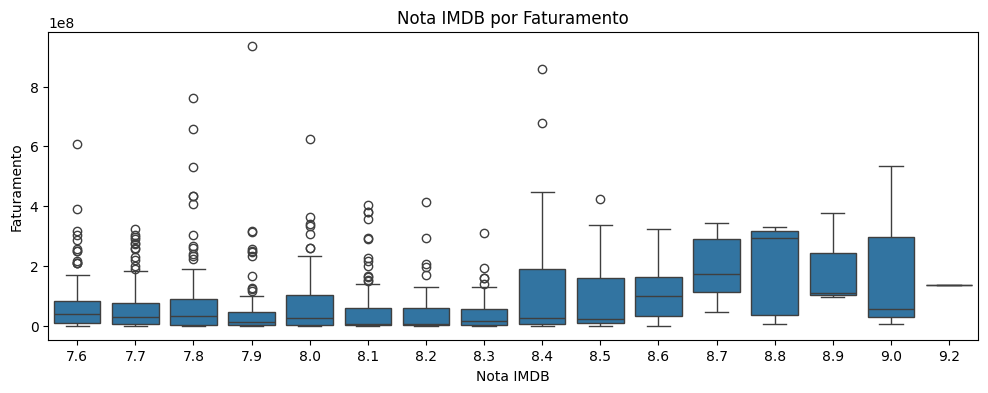

In [104]:

plt.figure(figsize=(12, 4))
sn.boxplot(x='IMDB_Rating', y='Gross', data=dados)
plt.title('Nota IMDB por Faturamento')
plt.xlabel('Nota IMDB')
plt.ylabel('Faturamento')

plt.show()

## Análise de Número de Votos

* Outra análise interessante que podemos fazer é sobre o número de votos.   
Os votos individuais são agregados e resumidos em uma nota única, exibida com destaque na página principal do título. [(III)](https://tecnoblog.net/responde/como-funcionam-as-notas-do-imdb/)     
Ou seja, os votos determinam  a “nota IMDb” exibida na página é calculada com base em todas as avaliações de todos os usuários.
O IMDb utiliza vários filtros para determinar o “peso” de determinadas avaliações na nota final, com o objetivo de diminuir ou eliminar o impacto de votações em massa combinadas para afetar a classificação de uma obra. [(IV)](https://tecnoblog.net/responde/como-funcionam-as-notas-do-imdb/)

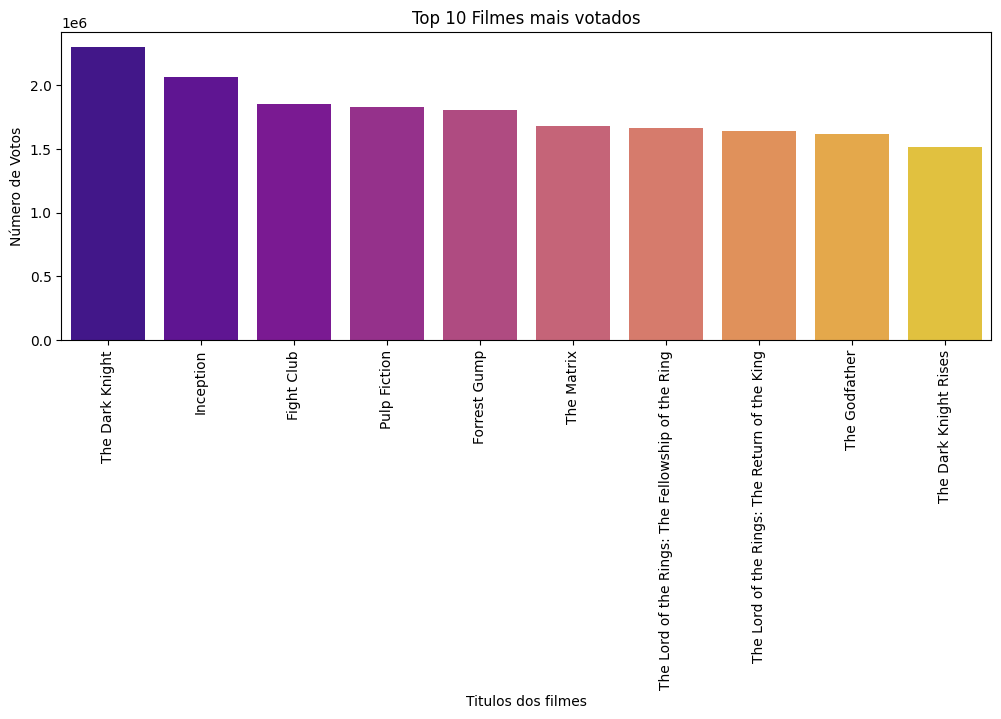

In [105]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = dados.groupby("Series_Title")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=False)
sn.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette=pallete)
for container in axes.containers:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.title("Top 10 Filmes mais votados")
plt.xlabel('Titulos dos filmes')
plt.ylabel('Número de Votos')
plt.show()


* Ao olhar os filmes mais votados por gêneros percebe-se novos insights.  
Action e sci-fi está em primeiro na lista dos filmes mais votados porém sci-fi está em décima primeira posição na lista de gêneros mais votados e action está em quinta posição.    
Vemos que drama so irá aparecer na quinta posição desta lista, enquanto drama está em primeira posição na lista de gêneros de filmes.


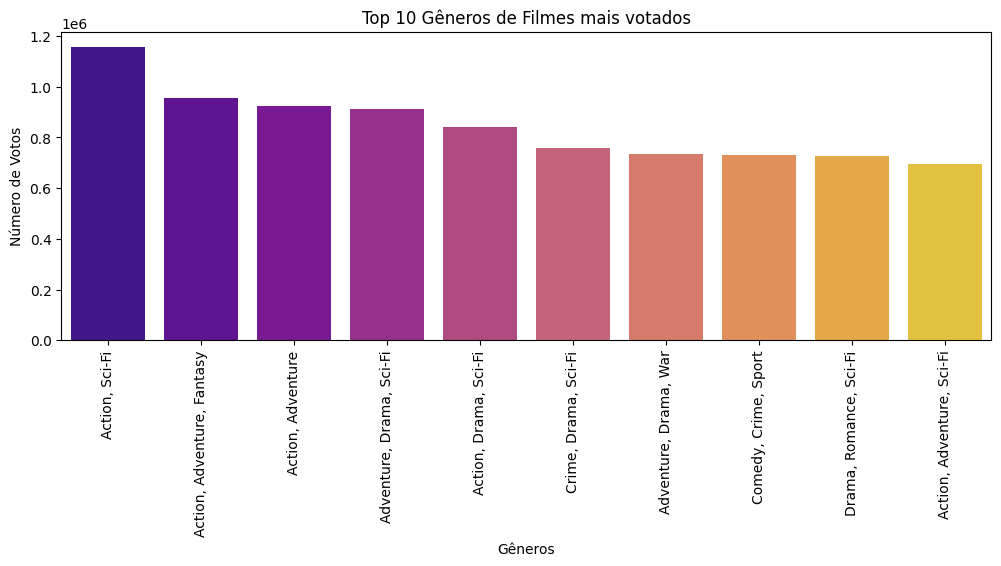

In [106]:
grouped = dados.groupby("Genre")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=False)
plt.figure(figsize=(12, 4))
sn.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, palette=pallete)
plt.xticks(rotation=90)
plt.title("Top 10 Gêneros de Filmes mais votados")
plt.xlabel('Gêneros')
plt.ylabel('Número de Votos')
plt.show()

* Abaixo podemos ver a análise de número de votos por ranking do IMDB.   
Com esta análise podemos ver que notas mais baixas no IMDB possuem menos números de votos e quando a nota tende a crescer o número de votos tambem cresce, isto indica dados que crescem de forma linear.

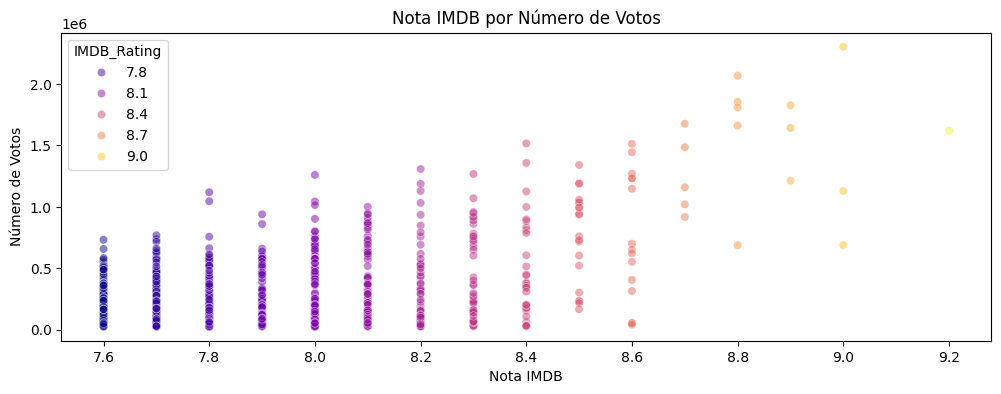

In [107]:
plt.figure(figsize=(12, 4))
scatter_votes = sn.scatterplot(x=dados['IMDB_Rating'], y=dados['No_of_Votes'], 
                          hue=dados['IMDB_Rating'], 
                          palette=pallete, 
                          alpha=0.5)
plt.title('Nota IMDB por Número de Votos')
plt.xlabel('Nota IMDB')
plt.ylabel('Número de Votos')

plt.show()

# Modelagem

* Para iniciar a nossa modelagem é necessário alguns passos anteriores antes de ver os modelos propriamente ditos.   
Começamos definindo algumas funções que ajudarão a visualizar como os modelos se comportam, estas funções mostrarão os erros que o modelo tem e como eles devem ser interpretados.   


* As medidas de erro da função abaixo é MSE e MAE.  


   * O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE. Entretanto, ao invés de usar o módulo do resultado entre o valor de y e ŷ, nesta métrica a diferença é elevada ao quadrado. Desta maneira penalizando valores que sejam muito diferentes entre o previsto e o real.    
   Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.[(V)](https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70#:~:text=O%20erro%20quadr%C3%A1tico%20m%C3%A9dio%20MSE,diferen%C3%A7a%20%C3%A9%20elevada%20ao%20quadrado.) 

      $ MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i} -{\^y}_{i})^2 % $


   * O erro médio absoluto (MAE — do inglês Mean Absoluto Error) ,mede a média da diferença entre o valor real com o predito. Mas por haver valores positivos e negativos, é adicionado um módulo entre a diferença dos valores.   Além disso, esta métrica não é afetada por valores discrepantes — os denominados outliers.[(VI)](https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70#:~:text=O%20erro%20quadr%C3%A1tico%20m%C3%A9dio%20MSE,diferen%C3%A7a%20%C3%A9%20elevada%20ao%20quadrado.) 
      
      $ MAE = \frac{1}{N}\sum_{i=1}^{n}|y_{i} -{\^y}_{i}| % $





In [108]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models_label_r = []
df_teste  = pd.DataFrame()
def ResidualForModels(models,y_pred): 
    for model in models:
        formalism = type(model).__name__
        models_label_r.append(formalism)
        y_pred_t = y_pred
        df_teste[formalism] = y_pred_t
    return df_teste

models_label = []
models_MSE = []
models_MAE = []
def computeAccuracyModels(models,y_pred): 
    for model in models:
        formalism = type(model).__name__
        models_label.append(formalism)
        y_pred_test = y_pred
        models_MSE.append(mean_squared_error(y_true=y_test.values.ravel(), y_pred=y_pred_test))
        models_MAE.append(mean_absolute_error(y_true=y_test.values.ravel(), y_pred=y_pred_test))
        
    df = pd.DataFrame({'model': models_label, 
                       'MSE': models_MSE,
                       'MAE': models_MAE,
                       
                       })
    print(" --------------------------- Medidas de Erro para os Modelos  --------------------------- ") 
    print(df.sort_values(by='MSE', ascending = True))
    
    

In [109]:
nome_arquivo_csv = 'data/desafio_indicium_imdb.csv'
dados = pd.read_csv(nome_arquivo_csv)

## Tratamento dos Dados

* Antes de iniciarmos a etapa de modelagem é necessário fazer alguns ajustes nos dados.    
    * Os ajustes que serão feitos são necessários pois alguns dados estão no formato object quando deveriam estar em um formato númerico, por isso os dados Meta Score, Runtime, Gross e Released Year devem ser convertidos para valores númericos. 


    * Os dados também possuem valores faltantes e não se pode imputar estes dados faltantes pois estaríamos fazendo um modelo tendencioso.   
    Por isso, é recomendado remover os dados  com valores ausentes pois se houver valores ausentes no dataframe não será possível aplicar os modelos preditivos.   

* Todo este processo é resumido em um pipeline e este pipeline é aplicado aos dados do dataframe conforme visto abaixo.


nome_arquivo_csv = 'data/desafio_indicium_imdb.csv'
dados = pd.read_csv(nome_arquivo_csv)

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# tratamanetos de variaveis
dados.dropna(axis=0, inplace=True)


from sklearn.model_selection import train_test_split
# tratamanetos de variaveis

treino, teste  = train_test_split(dados, test_size=0.2, random_state=42) # separação de 20% do conjuto para teste

def initial_treatment(dataset): # Função para pré-processamento
    dataset['Released_Year'] = dataset['Released_Year'].replace('PG', np.nan).astype(float)
    dataset['No_of_Votes'] = dataset['No_of_Votes'].astype(float)
    dataset['Gross'] = dataset['Gross'].str.replace(',', '').astype(float)
    dataset['Runtime'] = dataset['Runtime'].str.replace(' min', '').astype(float)

    return dataset

coluna_preditoras = ['Released_Year', 'No_of_Votes', 'Gross', 'Meta_score', 'Runtime']
coluna_alvo = 'IMDB_Rating'

# Pipeline para tratamento inicial e imputação (se necessário)
full_pipeline = Pipeline([
    ('initial_treatment', FunctionTransformer(func=initial_treatment)),
    ('imputer', SimpleImputer(strategy='median'))
])

# Separação de treino e teste com pipeline
X_train, y_train = full_pipeline.fit_transform(treino[coluna_preditoras]), treino[coluna_alvo]
X_test, y_test = full_pipeline.fit_transform(teste[coluna_preditoras]), teste[coluna_alvo]

* Abaixo escolhemos quais variáveis serão preditoras e qual será a variável prevista, conforme foi especificado a variável de interesse a ser prevista é IMDB Rating e usaremos como preditoras somente as variáveis quantitativas do dataframe pois as variáveis qualitativas possuem alguns obstáculos. 


    - A variável `Certificate`, embora seja qualitativa ordinal, ainda requer pesquisa prévia para ser utilizada adequadamente.

    
    - As variáveis `Genre`, `Director`, `Overview`, `Star1`, `Star2`, `Star3` e `Star4` são qualitativas do tipo nominal, ou seja, nenhuma se sobrepõe às outras por si só. Realizar uma codificação aumentaria o conjunto de dados muito além do necessário para os objetivos deste desafio.



# Modelos Otimizados

* A seguir faremos uma etapa de otimização de hiperparâmetros para tentar melhorar o desempenho dos modelos de Machine Learning.    
A otimização de hiperparâmetros é um passo crucial no desenvolvimento de modelos de machine learning.   
A escolha adequada dos valores dos hiperparâmetros pode levar a um modelo com melhor desempenho e generalização, enquanto valores inadequados podem resultar em modelos que não atendem às expectativas.    [(VII)](citação:https://awari.com.br/hiperparametros-em-machine-learning-otimizacao-e-ajuste/?utm_source=blog&utm_campaign=projeto+blog&utm_medium=Hiperpar%C3%A2metros%20em%20Machine%20Learning:%20Otimiza%C3%A7%C3%A3o%20e%20Ajuste#:~:text=A%20otimiza%C3%A7%C3%A3o%20de%20hiperpar%C3%A2metros%20%C3%A9,que%20n%C3%A3o%20atendem%20%C3%A0s%20expectativas.)   
Com isto poderemos buscar o melhor modelo de previsão e diminuir os erros do modelo.

## Linear Regression

* Abaixo está o modelo de regressão linear otimizado via Grid Search, o modelo testa vários parametros e escolhe os que melhoram o desempenho do modelo.   
Tambem é possivel ver os erros gerados por o modelo:


    * O MSE do modelo é de 0.039965,isto indica quadrado das diferenças entre as previsões do modelo e os valores reais é aproximadamente 0.039965.   

    
    * O MAE é de 0.160048 o que significa que, em média, as previsões do modelo estão a 0.160048 unidades dos valores reais.  
    
      
    Estas medidas de erro podem ser consideradas baixas, porém veremos a seguir que alguns modelos tem medidas de erro ainda menores.
    

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


model_lr = {
    'Linear Regression': LinearRegression()
}

param_grids_lr = {

    'Linear Regression': {
        'fit_intercept': [True, False],
    },
}

grid_search_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grids_lr['Linear Regression'],
    scoring=r2_score,  # Métrica a ser otimizada
    cv=5,  # Número de folds para validação cruzada
    n_jobs=-1  # Utilizar todos os núcleos do processador
)
grid_search_lr.fit(X_train, y_train)

y_pred_lr =  grid_search_lr.best_estimator_.predict(X_test)

ResidualForModels(models=[grid_search_lr.best_estimator_],y_pred=y_pred_lr)
computeAccuracyModels(models=[grid_search_lr.best_estimator_],y_pred=y_pred_lr)


 --------------------------- Medidas de Erro para os Modelos  --------------------------- 
              model       MSE       MAE
0  LinearRegression  0.039965  0.160048


## XGBoost

* Logo abaixo está outro modelo que tambem otimizado via Grid Search, o modelo XGBoost assim como os modelos anteriores testa vários parametros e escolhe os que melhoram o desempenho do modelo.   
Abaixo vemos os erros gerados por este modelo:


    * O MSE do modelo é de 0.051310  , isto indica quadrado das diferenças entre as previsões do modelo e os valores reais é aproximadamente 0.051310  .   

    
    * O MAE é de 0.184685 o que significa que, em média, as previsões do modelo estão a 0.184685 unidades dos valores reais. 

    Este modelo se mostra que o modelo de regressão linear visto anteriormente, os erros deste modelo são maiores e por isso o modelo de regressão linear ainda se mantém em primeiro.   
    O MSE do modelo de XGboost possui cerca de 0.02 a mais que o modelo de regressão linear e possui 0.02 a mais de MAE.

In [112]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

model_xg = {
    'XGBoost': xg.XGBRegressor()
}

param_grids_xg = {

    'XGBoost': {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 500],
        'max_depth': [3, 5],
        'min_child_weight': [1, 3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0.1, 0.5],
        'reg_alpha': [1e-5, 0.1],
        'reg_lambda': [1e-5, 0.1]
    }
}

grid_search_xg = GridSearchCV(
    estimator=xg.XGBRegressor(),
    param_grid=param_grids_xg['XGBoost'],
    scoring=r2_score,  # Métrica a ser otimizada
    cv=5,  # Número de folds para validação cruzada
    n_jobs=-1  # Utilizar todos os núcleos do processador
)
grid_search_xg.fit(X_train, y_train)

y_pred_xg =  grid_search_xg.best_estimator_.predict(X_test)

ResidualForModels(models=[grid_search_xg.best_estimator_],y_pred=y_pred_xg)
computeAccuracyModels(models=[grid_search_xg.best_estimator_],y_pred=y_pred_xg)

 --------------------------- Medidas de Erro para os Modelos  --------------------------- 
              model       MSE       MAE
0  LinearRegression  0.039965  0.160048
1      XGBRegressor  0.051310  0.184685


## Lasso

* Logo abaixo está outro modelo que também otimizado via Grid Search, o modelo Lasso assim como os modelos anteriores testa vários parametros e escolhe os que melhoram o desempenho do modelo.   
Abaixo vemos os erros gerados por este modelo:


    * O MSE do modelo é de 0.040102, isto indica quadrado das diferenças entre as previsões do modelo e os valores reais é aproximadamente 0.040102.   

    
    * O MAE é de 0.040102 o que significa que, em média, as previsões do modelo estão a 0.040102   unidades dos valores reais. 

    Este modelo possui o MSE maior que o modelo de regressão linear que foi definido anteriormente sendo 0.01 pontos a mais, e o MAE é aproximadamente 0.001 maior que o MAE do modelo de regresão linear.   
    Porém, este modelo tem desempenho bem melhor que o modelo de XGBoost.   

In [113]:
from sklearn.linear_model import Lasso
model_lasso = {
    'Lasso': Lasso()
}

param_grids_lasso = {

    'Lasso': {
        'alpha': [0.1, 1.0, 10.0]
    }
}

grid_search_lasso = GridSearchCV(
    estimator=Lasso(),
    param_grid=param_grids_lasso['Lasso'],
    scoring=r2_score,  # Métrica a ser otimizada
    cv=5,  # Número de folds para validação cruzada
    n_jobs=-1  # Utilizar todos os núcleos do processador
)
grid_search_lasso.fit(X_train, y_train)

y_pred_lasso =  grid_search_lasso.best_estimator_.predict(X_test)

ResidualForModels(models=[grid_search_lasso.best_estimator_],y_pred=y_pred_lasso)
computeAccuracyModels(models=[grid_search_lasso.best_estimator_],y_pred=y_pred_lasso)

 --------------------------- Medidas de Erro para os Modelos  --------------------------- 
              model       MSE       MAE
0  LinearRegression  0.039965  0.160048
2             Lasso  0.040102  0.161686
1      XGBRegressor  0.051310  0.184685


 * Abaixo podemos observar algumas previsões do modelo e os seus valores reais.

In [114]:
predicoes = ResidualForModels(models=[grid_search_lasso.best_estimator_],y_pred=y_pred_lasso)

predicoes['Real'] = list(y_test)
print("predições dos modelos:")
predicoes.head(10)

predições dos modelos:


,LinearRegression,XGBRegressor,Lasso,Real
0,7.989384,7.888125,7.982918,8.2
1,7.887443,7.907112,7.879278,7.9
2,8.291994,8.132642,8.290948,8.5
3,8.004016,8.018739,7.988324,8.0
4,7.766317,7.841747,7.789604,7.6
5,7.803731,7.869326,7.801206,7.8
6,8.201898,8.079706,8.188872,8.4
7,7.869785,7.882001,7.867820,7.6
8,7.738367,7.873330,7.743309,8.3
9,7.928020,7.896222,7.937698,7.6


## Residuos dos modelos 

* Quando dizemos que os resíduos de um modelo seguem uma distribuição normal, estamos afirmando que os erros (ou resíduos) que resultam da diferença entre os valores observados e os valores previstos pelo modelo são distribuídos de acordo com uma distribuição normal (ou gaussiana).       
Análisar essa distribuição de resiudos pode gerar insights interessantes como  saber que os resíduos são distribuídos simetricamente em torno de zero. Isso significa que não há viés sistemático nos erros de previsão do modelo.   
Além disso, assumir que os resíduos seguem uma distribuição normal, então essas inferências são válidas e confiáveis.

Para verificar essa distribuição faremos o teste de Shapiro-Wilk.   
O Teste de Shapiro-Wilk tem como objetivo avaliar se uma distribuição é semelhante a uma distribuição normal.    

A distribuição normal também pode ser chamada de gaussiana e sua forma assemelha-se a de um sino. Esse tipo de distribuição é muito importante, por ser frequentemente usada para modelar fenômenos naturais.   

Como resultado, o teste retornará a estatística W, que terá um valor de significância associada, o p-valor. Para dizer que uma distribuição é normal, o p-valor precisa ser maior do que 0.05.  [(VIII)](https://www.blog.psicometriaonline.com.br/o-que-e-o-teste-de-shapiro-wilk/)

* Ao efetuar o teste de Shapiro-Wilk podemos assumir que o único modelo que segue uma distribuição normal é o modelo lasso que possui o p-valor maior que 0.05, não podemos assumir isto dos outro modelos pois os outros modelo tem um p-valor menor que 0.5.    
Portanto, consideraremos o melhor modelo o modelo lasso que possui uma distribuição normal de residuos. 

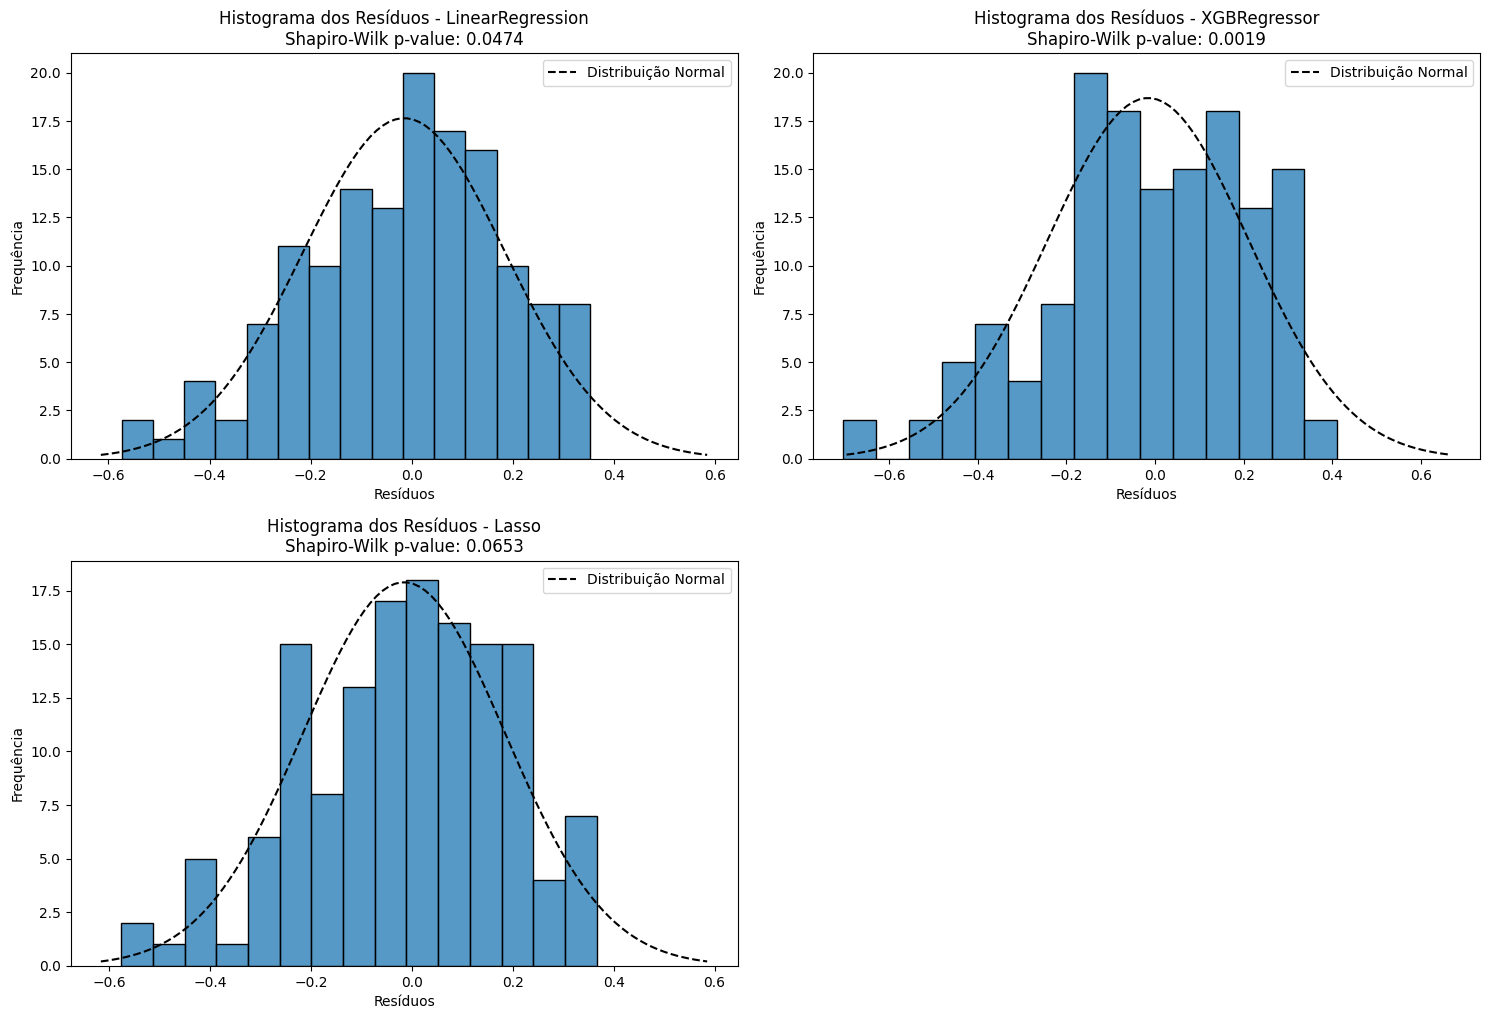

In [115]:

import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm, shapiro
# Função para extrair o valor de listas com um único elemento
def extract_value(value):
    return value[0] if isinstance(value, list) else value

# Aplicar a função ao DataFrame
df = predicoes.applymap(extract_value)

# Calcular os resíduos para cada modelo
residuals = pd.DataFrame()
for model in df.columns[:-1]:  # Ignorar a coluna 'Real'
    residuals[model] = df[model] - df['Real']

# Plotar histogramas dos resíduos para cada modelo e realizar o teste de Shapiro-Wilk
plt.figure(figsize=(15, 20))
for i, model in enumerate(residuals.columns):
    plt.subplot(4, 2, i + 1)
    sn.histplot(residuals[model], kde=False, bins=15)
    
    # Adicionar linha de distribuição normal
    mean = residuals[model].mean()
    std = residuals[model].std()
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    plt.plot(x, norm.pdf(x, mean, std) * len(residuals[model]) * (residuals[model].max() - residuals[model].min()) / 15, label='Distribuição Normal', color='black', linestyle='dashed')
    
    # Teste de Shapiro-Wilk
    stat, p_value = shapiro(residuals[model])
    plt.title(f'Histograma dos Resíduos - {model}\nShapiro-Wilk p-value: {p_value:.4f}')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()


## Previsão para dado adicional

* Ao adicionarmos um novo dado conforme foi pedido no desafio, vemos o valor que o modelo preve para o dado. 

In [116]:
new_data = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

# Criando um DataFrame com os dados de entrada
input_df = pd.DataFrame([new_data])

teste_new = full_pipeline.fit_transform(input_df[coluna_preditoras])


* Os modelos lasso e linear regression previram um valor de aproxidamente 9.3 enquanto o modelo de XGBoost previu um valor de aproximadamente 8.4.    
Como o modelo considerado o melhor foi o modelo lasso pela análise de seus residuos e além disso o modelo com menor erro que foi o de regressão linear previram o valor para o nota do novo dado sendo 9.3 temos forte tendência a acreditar que este seria o valor certo para o dado adicional.

In [117]:

y_pred_lr_new = grid_search_lr.best_estimator_.predict(teste_new)
print("Valor da Previsão com Decision Tree",y_pred_lr_new)
y_pred_xg_new = grid_search_xg.best_estimator_.predict(teste_new)
print("Valor da Previsão com XGboost",y_pred_xg_new)
y_pred_lass_new = grid_search_lasso.best_estimator_.predict(teste_new)
print("Valor da Previsão com Lasso",y_pred_lass_new)

Valor da Previsão com Decision Tree [9.29425554]
Valor da Previsão com XGboost [8.3722925]
Valor da Previsão com Lasso [9.29226904]


* Conforme dito anteriormente o melhor modelo é o modelo Lasso, abaixo salvamos este modelo no formato pkl conforme pedido no desafio.   

In [118]:
import joblib
import os
joblib.dump(grid_search_lasso.best_estimator_, 'modelo/modelo_lasso.pkl')

# Verificando se a pasta 'modelo' existe, senão cria
if not os.path.exists('modelo'):
    os.makedirs('modelo')


# Perguntas 


* Ao fazer a Análise Exploratória dos Dados(EDA) e aplicar os modelos de predição podemos finalmente responder as perguntas da forma mais objetiva possível pois ja conheçemos os dados de forma bastante aprofundada.     
Então podemos conferir estas respostas abaixo.   

## 2. Responda também às seguintes perguntas:

### a) Qual filme você recomendaria para uma pessoa que você não conhece?

* Está tarefa pode ser complicada pois já que você não conhece a pessoa não sabe de que gênero ela gosta e assim pode ser dificil recomendar um filme.   
Porém, baseado nos dados é possivel fazer a recomendação de um filme que baseado em notas de IMDB e  Classificação etária.   
No código abaixo filtramos os filmes que possuam uma nota de IMDB  maior que 8.3 e que sua Classificação etária seja U (universal).  
Assim, o filme poderá ser ter qualquer público e ter uma nota alta.   
Dos filmes abaixo minha recomendação seria o filme WALL-E  que possui os gêneros Animation(Animação), Adventure(Aventura) e Family(Familia).

In [119]:
resultado = d1.query("IMDB_Rating >= 8.4 and Certificate in ['U']")
display(resultado)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
3,4,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
9,10,The Lord of the Rings: The Fellowship of the Ring,2001.0,U,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0
19,20,Soorarai Pottru,2020.0,U,153.0,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
22,23,Sen to Chihiro no kamikakushi,2001.0,U,125.0,"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,10055859.0
25,26,La vita è bella,1997.0,U,116.0,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,59.0,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,57598247.0
30,31,Shichinin no samurai,1954.0,U,207.0,"Action, Adventure, Drama",8.6,A poor village under attack by bandits recruit...,98.0,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,315744,269061.0
35,36,The Prestige,2006.0,U,130.0,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",66.0,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891.0
42,43,The Lion King,1994.0,U,88.0,"Animation, Adventure, Drama",8.5,Lion prince Simba and his father are targeted ...,88.0,Roger Allers,Rob Minkoff,Matthew Broderick,Jeremy Irons,James Earl Jones,942045,422783777.0
43,44,Terminator 2: Judgment Day,1991.0,U,137.0,"Action, Sci-Fi",8.5,"A cyborg, identical to the one who failed to k...",75.0,James Cameron,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,Robert Patrick,995506,204843350.0


###  b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

* Conforme visto na análise explorátoria dos dados existem fatores que estão relacionados com o faturamento de um filme.   
Como por exemplo a Classificação etária do filme, filmes com um alto faturamento tendem a ter classificações etárias que possam abranger mais público.    
Abaixo podemos ver um gráfico que mostra isso, os maiores faturamento tem a classificação etária UA e A que são classicações que tem um maior número de espectadores por serem mais livres.   

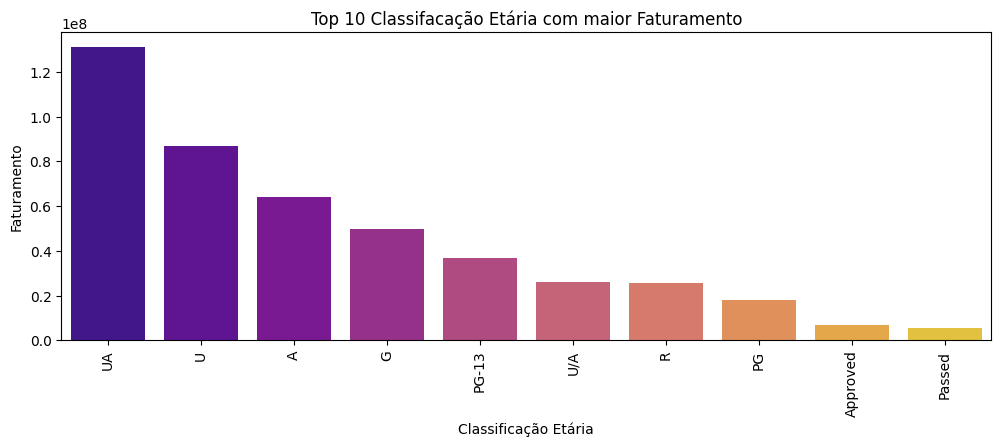

In [120]:
fig, axes = plt.subplots(figsize=(12,4))
grouped = d1.groupby("Certificate")
mean = pd.DataFrame(grouped["Gross"].mean())
mean_1 = mean.sort_values("Gross", ascending=False)
sn.barplot(x=mean_1.index[:10], y=mean_1.iloc[:10, 0].values, ax=axes, palette=pallete)
for container in axes.containers:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.title("Top 10 Classifacação Etária com maior Faturamento")
plt.xlabel('Classificação Etária')
plt.ylabel('Faturamento')
plt.show()

* Outro ponto que possui relação com o faturamento é a nota no IMDB.     
Conforme é possível ver no gráfico abaixo notas mais baixas de IMDB tendem a ter um faturamento em média mais baixo, e por isso um filme com maior nota no IMDB pode gerar um faturamento maior.  

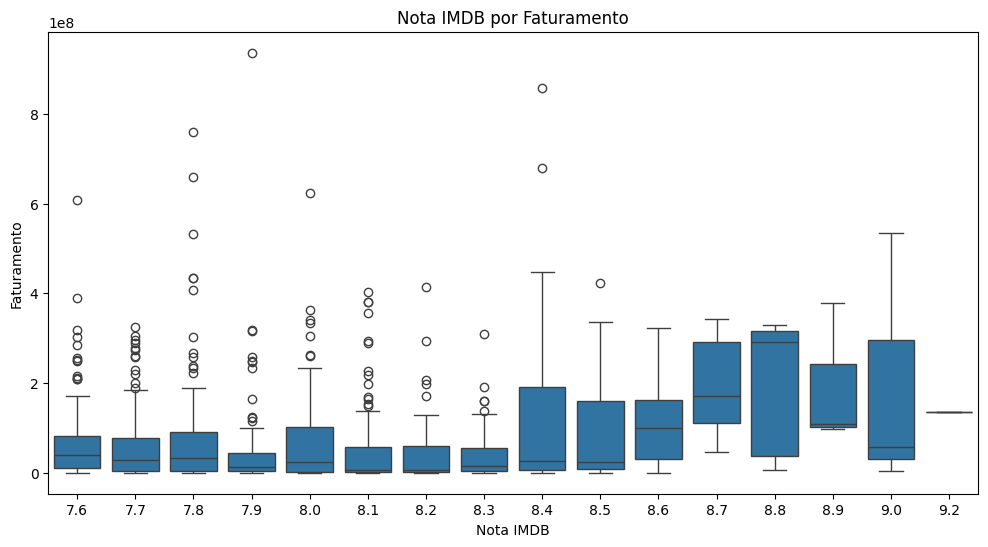

In [121]:
plt.figure(figsize=(12, 6))
sn.boxplot(x='IMDB_Rating', y='Gross', data=d1)
plt.title('Nota IMDB por Faturamento')
plt.xlabel('Nota IMDB')
plt.ylabel('Faturamento')

plt.show()

### c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

* É possivel retirar vários insights da coluna overview, como a coluna overview é uma breve descrição do filme é possivel a partir dela saber qual questão o filme tratará, qual a sua trama ou sobre o que a historia do filme fala.     
Além disso, também é possivel inferir outras coisas sobre o filme como gênero, existe bibliotecas em python que torna possível fazer uma análise textual como é o caso da biblioteca Nltk (Natural Language Toolkit).   
Ela fornece uma ampla gama de ferramentas e recursos para lidar com texto e linguagem, permitindo que os desenvolvedores implementem soluções avançadas de análise e processamento de texto. O Nltk é amplamente utilizado em aplicações de aprendizado de máquina, mineração de texto, extração de informações e muito mais.  [(IX)](https://awari.com.br/aprenda-python-com-o-poderoso-nltk-o-guia-completo-para-iniciantes/?utm_source=blog&utm_campaign=projeto+blog&utm_medium=Aprenda%20Python%20com%20o%20Poderoso%20Nltk:%20o%20Guia%20Completo%20para%20Iniciantes)   
Com está biblioteca pode-se fazer uma análise de sentimentos sobre o texto, algumas palavras podem expressar sentimento como por exemplo a palvra engraçado que pode ser atribuida ao gênero comédia, ou amor que pode ser atribuida ao gênero romance e assim por diante.   
Porém, é necessário uma análise sobre os dados pois textos que contenham ironia podem ser facilmente interpretados por pessoas, mas podem ser  dificeis de ser interpretados por máquinas.

## Pergunta 3
### - Explique como você faria a previsão da nota do imdb a partir dos dados. 



* Conforme especificado na seção de modelagem, a previsão dos dados é feita a partir das variáveis númericas do dataframe.   
Usamos somente as variáveis númericas pois as variáveis qualitativas possuem obstáculos que dificultam o processo de previsão.   
    * A variável `Certificate` requer pesquisa prévia para ser utilizada adequadamente e por isso não foi incluidos nas variáveis preditoras.

    
    * As variáveis `Genre`, `Director`, `Overview`, `Star1`, `Star2`, `Star3` e `Star4` também não foram incluidas como variáveis preditoras pois são qualitativas do tipo nominal, ou seja, nenhuma se sobrepõe às outras por si só. Realizar uma codificação aumentaria o conjunto de dados muito além do necessário para os objetivos deste desafio.

* As variáveis preditoras escolhidas foram `Released_Year`, `No_of_Votes`, `Gross`, `Meta_score`, `Runtime` é possível ver na análise explorátoria dos dados que estas variáveis possuem correlação com a nota do IMDB como por exemplo o número de votos, quando o numero de votos é maior algumas notas de IMDB tendem a subir e se o número de votos for mais baixo a nota tende a estar abaixo de 8.4.


* Após as escolhas das variáveis que funcionarão como preditoras é feito o ajuste desses valores como conversão de tipo, como foi feito nos dados, e também a esclusão de valores nulos para ser aplicados os modelos preditivos sem erros.   
Feito a escolha das variáveis preditoras dividimos o conjunto de dados em treinamento e em teste.   
Usamos 80% dos dados para treinamento e 20% para dados de teste, com isso podemos aplicar os modelos preditivos escolhidos e então treinar os dados usando o conjunto de treinamento para ajustar o modelo aos dados.    
Assim, podemos testar o modelo já treinado no conjunto de teste para avaliar sua performance, está performace é avaliada pelas métricas de erro do modelo.   
As métricas de erro usadas foram MSE(Erro Quadrático Médio) e MAE( Erro Absoluto MédiO), com isso definimos se o modelo tem boa performace e se serve para prever o valor de nota do IMDB corretamente.

###  - Quais variáveis e/ou suas transformações você utilizou e por quê?


* As variáveis preditoras escolhidas foram `Released_Year`, `No_of_Votes`, `Gross`, `Meta_score`, `Runtime` é possível ver na análise explorátoria dos dados que estas variáveis possuem correlação com a nota do IMDB como por exemplo o número de votos, quando o numero de votos é maior algumas notas de IMDB tendem a subir e se o número de votos for mais baixo a nota tende a estar abaixo de 8.4.   
Estas variáveis tiveram de passar por transformações pois não estavam no tipo desejado, algumas dessas variáveis como  `Released_Year`, `No_of_Votes`, `Gross`,`Runtime` tiveram de ser convertidas para valores do tipo `float` para serem passadas para o modelo.   
  
* Conforme citado em outras seções usamos somente as variáveis númericas(quantitativas) pois as variáveis qualitativas possuem obstáculos que dificultam o processo de previsão,.      


    *   A variável `Certificate` requer pesquisa prévia para ser utilizada adequadamente e por isso não foi incluidos nas variáveis preditoras.    

    *   As variáveis `Genre`, `Director`, `Overview`, `Star1`, `Star2`, `Star3` e `Star4` também não foram incluidas como variáveis preditoras pois são qualitativas do tipo nominal, ou seja, nenhuma se sobrepõe às outras por si só. Realizar uma codificação aumentaria o conjunto de dados muito além do necessário para os objetivos deste desafio.     


### -  Qual tipo de problema estamos resolvendo (regressão, classificação)? 


* O problema a ser solucionado é um problema de regressão pois a variável que queremos prever(`IMDB_Rating`) é do tipo quantitativa continua elas assumir qualquer valor decimal dentro de um intervalo, por exemplo, de 1 a 10. Embora na prática possam ser arredondadas a uma ou duas casas decimais, elas ainda representam uma variável contínua, pois podem assumir infinitos valores dentro de um intervalo.   
Assim, o problema é de regressão pois a variável é do tipo quantitativa continua, ou seja, númerica.

### -  Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

* O modelo considerado melhor foi o modelo lasso, o modelo lasso foi considerado o melhor pois ao aplicar o teste de Shapiro-Wilk que foi feito na seção de análise de residuos vimos que podemos considerá-lo como um modelo lasso segue uma distribuição normal de residuos.    
Isso significa que não há viés sistemático nos erros de previsão do modelo.   
Além disso, assumir que os resíduos seguem uma distribuição normal, então essas inferências são válidas e confiáveis.    
Assim, consideramos o modelo lasso como o melhor modelo.   
Porém, o modelo lasso há um contra, os erros MSE e MAE são maiores que o modelo de regressão linear, mas o modelo de  regressão linear não segue uma distribuição normal de residuos

### - Qual medida de performance do modelo foi escolhida e por quê?

* Foram usadas as Medidas MSE e MAE.  
Conforme descrito anteriormente, o MSE consegue penalizar valores que sejam muito diferentes entre o previsto e o real.   
Já o MAE  não é afetado por valores discrepantes — os denominados outliers.   
Além disso, são erros que são faceis de interpretar pois quanto menor o valor do erro do modelo significa que o modelo tende a errar menos as previsões.


## Pergunta 4
### Supondo um filme com as seguintes características:

    {'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'}


Qual seria a nota do IMDB?


* Conforme discutido em celulas anteriores o melhor modelo foi o modelo lasso, portanto passaremos o novo dados pelo pipeline e faremos a predição com esse modelo para saber a nota do IMDB.

In [122]:
new_data_1 = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

# Criando um DataFrame com os dados de entrada
input_df_1 = pd.DataFrame([new_data_1])

teste_new_1 = full_pipeline.fit_transform(input_df_1[coluna_preditoras])

* O modelo lasso preve uma nota de 9.29226904 para o novo dado adicionado, em termos arrendados a nota do filme seria de 9.3.

In [123]:
y_pred_lass_new_1 = grid_search_lasso.best_estimator_.predict(teste_new_1)
print("Valor da Previsão com Lasso",y_pred_lass_new_1)

Valor da Previsão com Lasso [9.29226904]
